In [1]:
# REFERENCES

# [1] https://www.tensorflow.org/federated/api_docs/python/tff/federated_computation
# [2] TensorFlow Federated Tutorial Session, Google Tech Talk, Youtube, https://www.youtube.com/watch?v=JBNas6Yd30A

# REQUIREMENTS

# Might need to first install CMake
# $ pip install CMake

# tensorflow-federated: A Python open-source framework for machine learning and other computations on decentralized data.
# $ pip install --upgrade tensorflow-federated

# nest-asyncio: A Python module that patches asyncio to allow nested use of asyncio.run and loop.run_until_complete.
# $ pip install --upgrade nest-asyncio

In [2]:
#!pip install --quiet --upgrade tensorflow-federated
#!pip install --quiet --upgrade nest-asyncio

# Local networking stuff. Cant run on Google Colab due to security reasons.
# Allowing the nested use of asyncio.run and Loop.run_until_complete.
import nest_asyncio
nest_asyncio.apply()

In [3]:
# TensorBoard provides the visualization and tooling needed for machine learning experimentation
%reload_ext tensorboard

In [4]:
import collections

import numpy as np
from matplotlib import pyplot as plt
print("here")
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)
print("here")
# A Federated Computation (or FC) is a computation where the data stays on clients' machines [2]
# This function simulates a federated computation given any python computation [1]
#tff.federated_computation(lambda: 1+1)()
print(tff.federated_computation(lambda: 'Hello, World!')())


# Federated Computations are made of three steps:
#       1. Federated Broadcast: Publicly broadcast Global Model to clients.
#       2. Federated Map: Privately train local parameters using private data and Global Model on the client-side.
#       3. Federated Mean: Aggregate clients' locally trained parameters.

here


2023-02-26 22:29:31.321083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 22:29:31.499696: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-26 22:29:31.499838: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-26 22:29:36.645892: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

here


2023-02-26 22:29:54.307933: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-26 22:29:54.308102: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-26 22:29:54.308223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FLS273M): /proc/driver/nvidia/version does not exist
2023-02-26 22:29:54.308737: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-02-26 22:29:54.309279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFl

KeyboardInterrupt: 

In [22]:
# Federated data is split amongst the clients and privately used in client-side Federated Mapping
# To make things easy for demos, Tensorflow made MNIST into a federated data set by 
# keying the data by the original writer of the digits.
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

emnist_train

In [23]:
# Client IDs can be accessed from the federated datasets
client_ids = emnist_train.client_ids
print(len(client_ids))
print(client_ids)

3383
['f0000_14', 'f0001_41', 'f0005_26', 'f0006_12', 'f0008_45', 'f0011_13', 'f0014_19', 'f0016_39', 'f0017_07', 'f0022_10', 'f0023_08', 'f0029_05', 'f0030_12', 'f0031_02', 'f0032_27', 'f0034_08', 'f0035_19', 'f0036_39', 'f0037_16', 'f0038_42', 'f0039_14', 'f0040_25', 'f0041_30', 'f0042_43', 'f0043_10', 'f0048_00', 'f0049_32', 'f0052_42', 'f0054_14', 'f0055_09', 'f0058_07', 'f0059_21', 'f0062_25', 'f0064_04', 'f0065_00', 'f0066_37', 'f0067_25', 'f0068_00', 'f0069_14', 'f0071_21', 'f0072_36', 'f0075_46', 'f0077_13', 'f0081_26', 'f0082_40', 'f0083_09', 'f0084_19', 'f0085_01', 'f0087_24', 'f0088_22', 'f0089_16', 'f0090_10', 'f0093_24', 'f0094_41', 'f0096_45', 'f0097_05', 'f0098_33', 'f0102_31', 'f0104_43', 'f0106_05', 'f0107_06', 'f0108_12', 'f0110_48', 'f0112_07', 'f0113_31', 'f0115_34', 'f0116_23', 'f0119_44', 'f0120_29', 'f0122_45', 'f0123_28', 'f0124_11', 'f0125_02', 'f0127_07', 'f0128_00', 'f0129_32', 'f0130_28', 'f0133_23', 'f0135_03', 'f0139_23', 'f0141_43', 'f0142_39', 'f0144_05'

In [24]:
# Example of a single client's dataset from index 533
# Returns a t
client_dataset = emnist_train.create_tf_dataset_for_client(emnist_train.client_ids[533])

# View the dataset's specs.
# Specs will show the dataset holds labels and a single label is mapped to a pixels dataset with 28 rows and collumns.
client_dataset.element_spec

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [25]:
# Iterating over the client's entire dataset
# Each element is composed of a label digit and an array of pixels.
for element in client_dataset:
    print(element) # print `element['label'].numpy()` instead to print each label only.

OrderedDict([('label', <tf.Tensor: shape=(), dtype=int32, numpy=0>), ('pixels', <tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 

OrderedDict([('label', <tf.Tensor: shape=(), dtype=int32, numpy=9>), ('pixels', <tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 

OrderedDict([('label', <tf.Tensor: shape=(), dtype=int32, numpy=8>), ('pixels', <tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 

OrderedDict([('label', <tf.Tensor: shape=(), dtype=int32, numpy=9>), ('pixels', <tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 

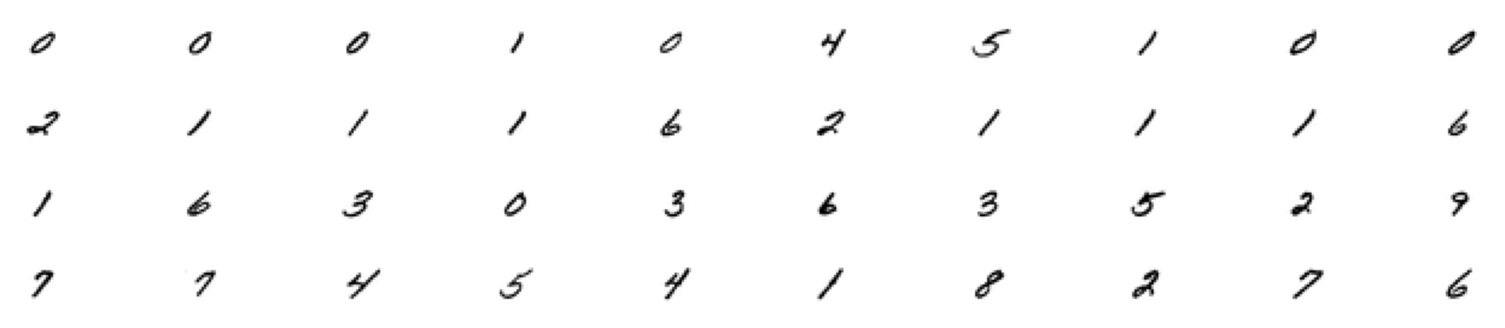

In [26]:
## Example of 40 MNIST digits taken from one client's dataset
figure = plt.figure(figsize=(20, 4))
j = 0

for element in client_dataset.take(40):
  plt.subplot(4, 10, j+1)
  plt.imshow(element['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

In [27]:
# Grabbing a single element in the client's dataset
example_element = next(iter(client_dataset))

# Grabbing the element's label.
example_element['label'].numpy()

0

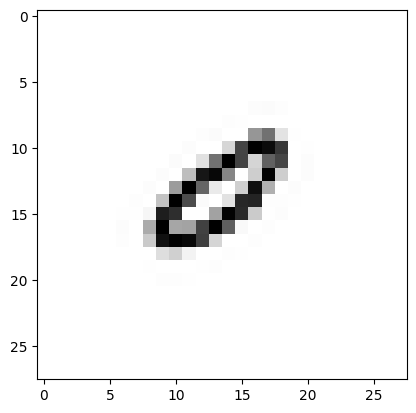

In [28]:
# Visualizing the pixels in 

plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()

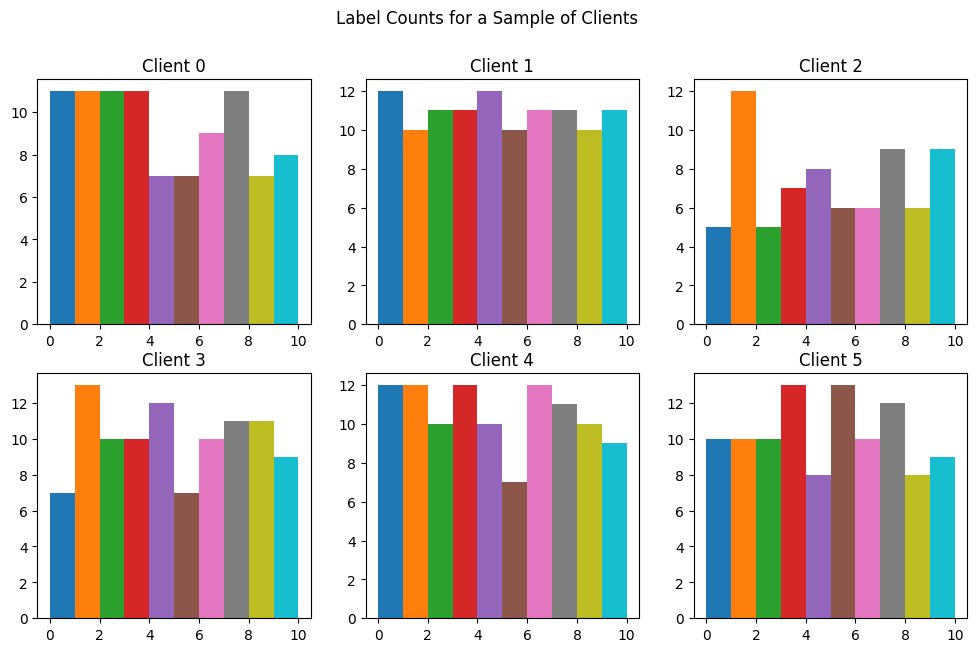

In [29]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')


for i in range(6):
    # Get a client's data
    client_dataset = emnist_train.create_tf_dataset_for_client(emnist_train.client_ids[i])
    
    # Get a dictionary
    plot_data = collections.defaultdict(list)
    
    # each digit[label, pixels] in the client's data
    for example in client_dataset:
        
        # Get digit's label
        label = example['label'].numpy()
        
        # Add digit to dictionary, with itself as a key
        # So plot_data would look like {1:[1,1,1,1,1,1,1], 2:[2,2,2,2,2,2,2], 3:[3,3,3,3,3,3,3,3]}
        plot_data[label].append(label)
    
    # 2 rows and 3 columns of plots
    plt.subplot(2, 3, i+1)
    
    # Set client number as the plot's title, e.g. "Client 2"
    plt.title('Client {}'.format(i))
    
    # For each digit
    for j in range(10):
        # Plot a histogram using the disctionary and 0-10 as the bins to drop the counts into
        plt.hist(plot_data[j], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

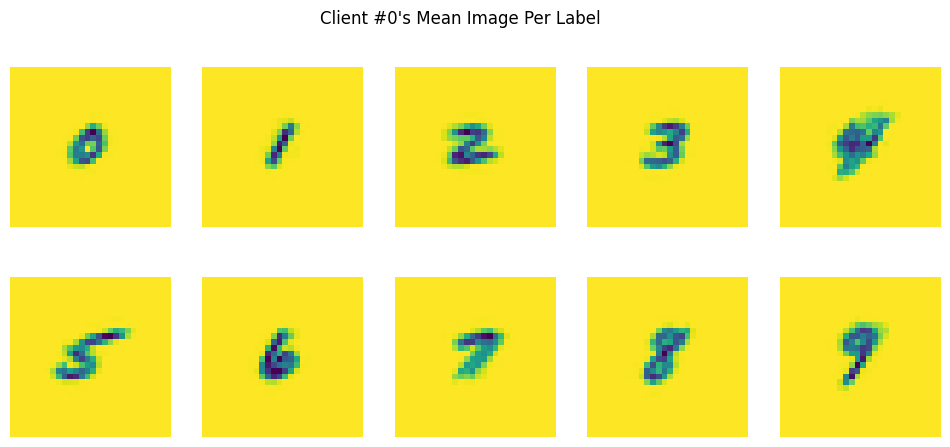

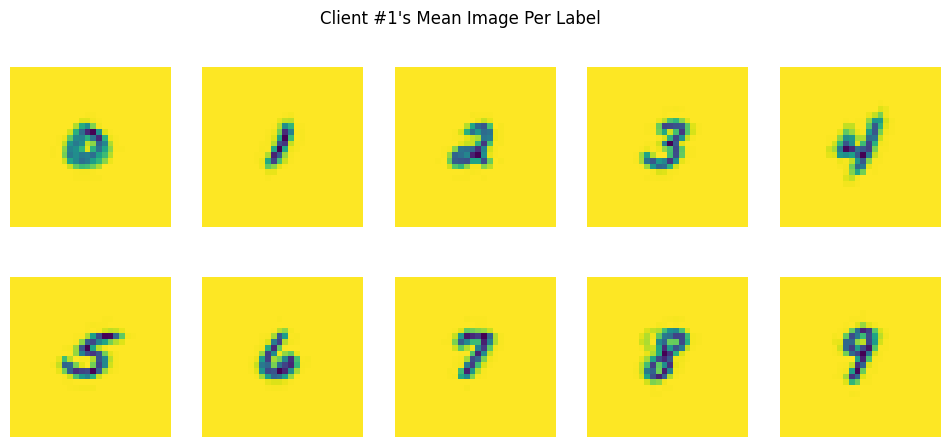

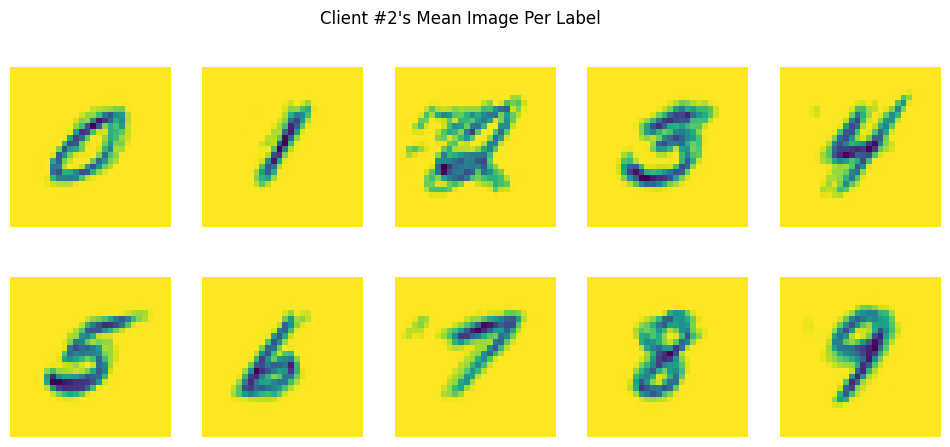

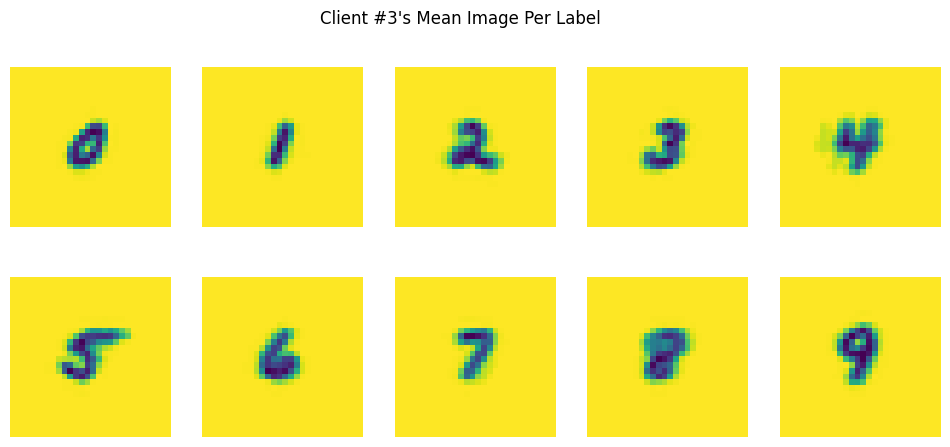

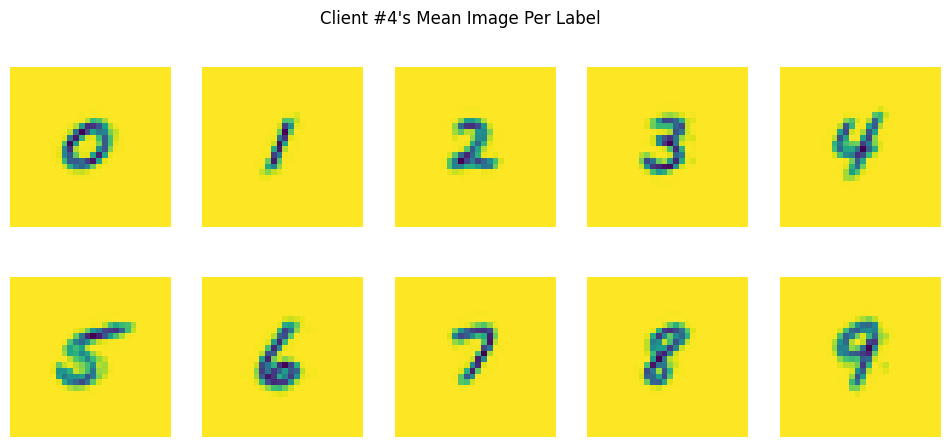

In [30]:
# Each client has different mean images, meaning each client will be nudging
# the model in their own directions locally.

for i in range(5):
  
  # Get client's dataset
  client_dataset = emnist_train.create_tf_dataset_for_client(emnist_train.client_ids[i])
  
  # Create an empty dictionary
  plot_data = collections.defaultdict(list)
  
  # For each digit in client_dataset
  for example in client_dataset:
    # Populate dictionary with (key=label, value=pixels)
    plot_data[example['label'].numpy()].append(example['pixels'].numpy())
  
  # Initialize a figure to be 12 inches by 5.
  f = plt.figure(i, figsize=(12, 5))
  # Give a subtitle to the figure
  f.suptitle("Client #{}'s Mean Image Per Label".format(i))
  
  for j in range(10):
    # Aggregate all the Pixels for each Digit, into an average set of pixels
    mean_img = np.mean(plot_data[j], 0)
    # Create a subplot for each Digit, in a 2 by 5 grid, for each client.
    plt.subplot(2, 5, j+1)
    # Show the aggregated digit images of each digit for this client.
    plt.imshow(mean_img)
    # Remove the x,y axis from the plot
    plt.axis('off')

In [31]:
NUM_CLIENTS = 10
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    
    return collections.OrderedDict(
        # Reshape pixels for this Digit from a 28x28 2D array, into a 1D array with 784 pixels
        # and return the (Label, [Pixels]) as an `OrderedDict`.
        x=tf.reshape(element['pixels'], [-1, 784]),
        y=tf.reshape(element['label'], [-1, 1]))
  # Return reformated, batched, shuffled OrderedDicts of each Digit in the given client dataset
  # prefetch is used to fetch a set of batches (10 in this case) in order to speed up the ML processing.
  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [32]:
preprocessed_example_dataset = preprocess(client_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x',
              array([[1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     ...,
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)),
             ('y',
              array([[5],
                     [1],
                     [2],
                     [4],
                     [4],
                     [1],
                     [3],
                     [6],
                     [8],
                     [2],
                     [2],
                     [3],
                     [2],
                     [2],
                     [7],
                     [9],
                     [9],
                     [4],
                     [1],
                     [5]], dtype=int32))])

In [33]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

In [34]:
# Sample of 10 clients
sample_clients = emnist_train.client_ids[0:NUM_CLIENTS]
# 
federated_train_data = make_federated_data(emnist_train, sample_clients)

print(f'Number of client datasets: {len(federated_train_data)}')
print(f'Set of OrderedDicts: {federated_train_data}')

Number of client datasets: 10
Set of OrderedDicts: [<PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>, <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>, <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>, <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>, <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>, <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(N

In [35]:
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [36]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [37]:
training_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [38]:
print(training_process.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[784,10],
      float32[10]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[784,10],
    float32[10]
  >
>@SERVER)


In [39]:
train_state = training_process.initialize()

KeyboardInterrupt: 

In [ ]:
def model_fn():
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])